In [1]:
import mne 
import numpy as np 
import matplotlib as plt

In [2]:
file_path = '/Users/e4/E-2/DEAP_DATA/s01.dat'
data = np.fromfile(file_path, dtype=np.float32)

n_channels = 40       
n_time_points = 8064  
n_trials = len(data) // (n_channels * n_time_points)
data = data[:n_trials * n_channels * n_time_points].reshape(n_trials, n_channels, n_time_points)
subset = data[:10]  
print(subset.shape)

(10, 40, 8064)


In [3]:
if np.isnan(subset).any() or np.isinf(subset).any(): 
    subset = np.nan_to_num(subset)
    print("NaNs or Infs found and replaced.")
else:
    print("No NaNs or Infs found.")

NaNs or Infs found and replaced.


In [4]:
subset_flattened = subset.reshape(n_channels, 10 * n_time_points)
info = mne.create_info(ch_names=[f'EEG {i+1}' for i in range(n_channels)], sfreq=128, ch_types='eeg')
raw = mne.io.RawArray(subset_flattened, info)
print(raw.info)

Creating RawArray with float64 data, n_channels=40, n_times=80640
    Range : 0 ... 80639 =      0.000 ...   629.992 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG 1, EEG 2, EEG 3, EEG 4, EEG 5, EEG 6, EEG 7, EEG 8, EEG 9, ...
 chs: 40 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 40
 projs: []
 sfreq: 128.0 Hz
>


In [5]:
original_raw = raw.copy()
raw.apply_hilbert()
print(
    f"original data type was {original_raw.get_data().dtype}, after "
    f"apply_hilbert the data type changed to {raw.get_data().dtype}."
)

original data type was float64, after apply_hilbert the data type changed to complex128.


In [6]:
print(f'original data had {original_raw.info["nchan"]} channels.')
original_raw.pick("eeg")  
print(f'after picking, it has {original_raw.info["nchan"]} channels.')

original data had 40 channels.
after picking, it has 40 channels.


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Using matplotlib as 2D backend.


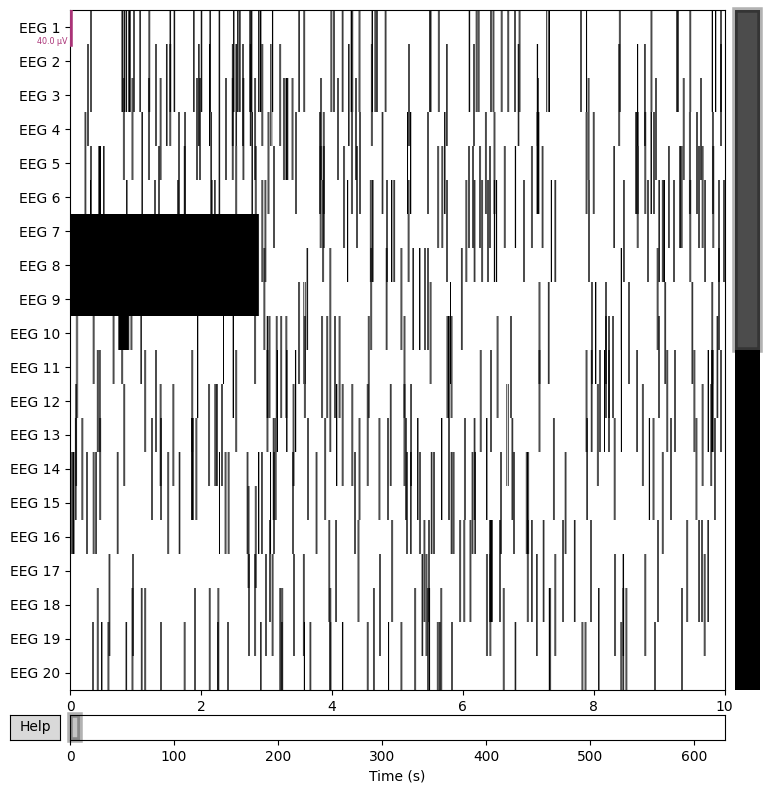

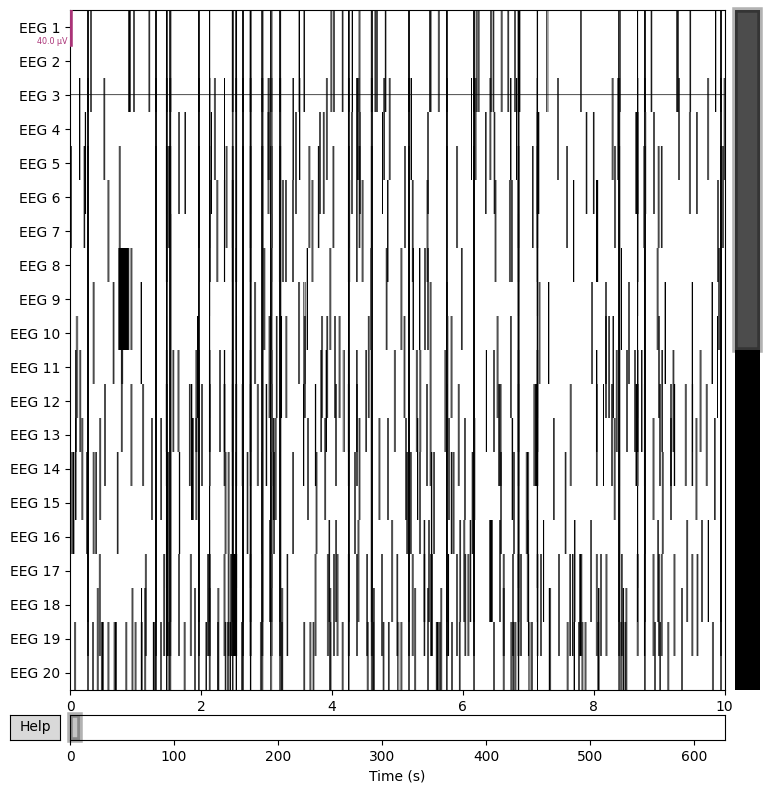

In [7]:
rereferenced_raw, ref_data = mne.set_eeg_reference(original_raw, ["EEG 3"], copy=True)
fig_orig = original_raw.plot()
fig_reref = rereferenced_raw.plot()

In [8]:
channel_names = raw.info['ch_names']
print(channel_names)

['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8', 'EEG 9', 'EEG 10', 'EEG 11', 'EEG 12', 'EEG 13', 'EEG 14', 'EEG 15', 'EEG 16', 'EEG 17', 'EEG 18', 'EEG 19', 'EEG 20', 'EEG 21', 'EEG 22', 'EEG 23', 'EEG 24', 'EEG 25', 'EEG 26', 'EEG 27', 'EEG 28', 'EEG 29', 'EEG 30', 'EEG 31', 'EEG 32', 'EEG 33', 'EEG 34', 'EEG 35', 'EEG 36', 'EEG 37', 'EEG 38', 'EEG 39', 'EEG 40']
